
    Author: Jutraman
    Date: 30 Jan 2021


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Get data

---



In [60]:
# load data from file
data = pd.read_csv('./titanic_2.csv')
print(data.columns.values.tolist())

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


Have an initial inspection of the data

In [61]:
# print all columns in full, prevent line break
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) 

print('\nInformation of the titanic dataset...... \n')
print(data.info())
print('\nColumn names of the dataset...... \n', data.columns)


print('\nBelow is the first few lines of the dataset......\n',data.head(10))
print('\nBelow is the statistics of the dataset......\n', data.describe())


Information of the titanic dataset...... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 n

The dataset doesn't contains private info columns and some sensetive columns, such as operationg system, have been replaced by integers. Hence, no columns need to been droped.

# Dealing with missing values

To check missing values and found nothing.

In [62]:
data.isna().sum()   

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Data Exploration

## Scatter plot

Scatter plot shows data distribution of a pair of features, it can visuallly reveal the relationship between a feature pair.

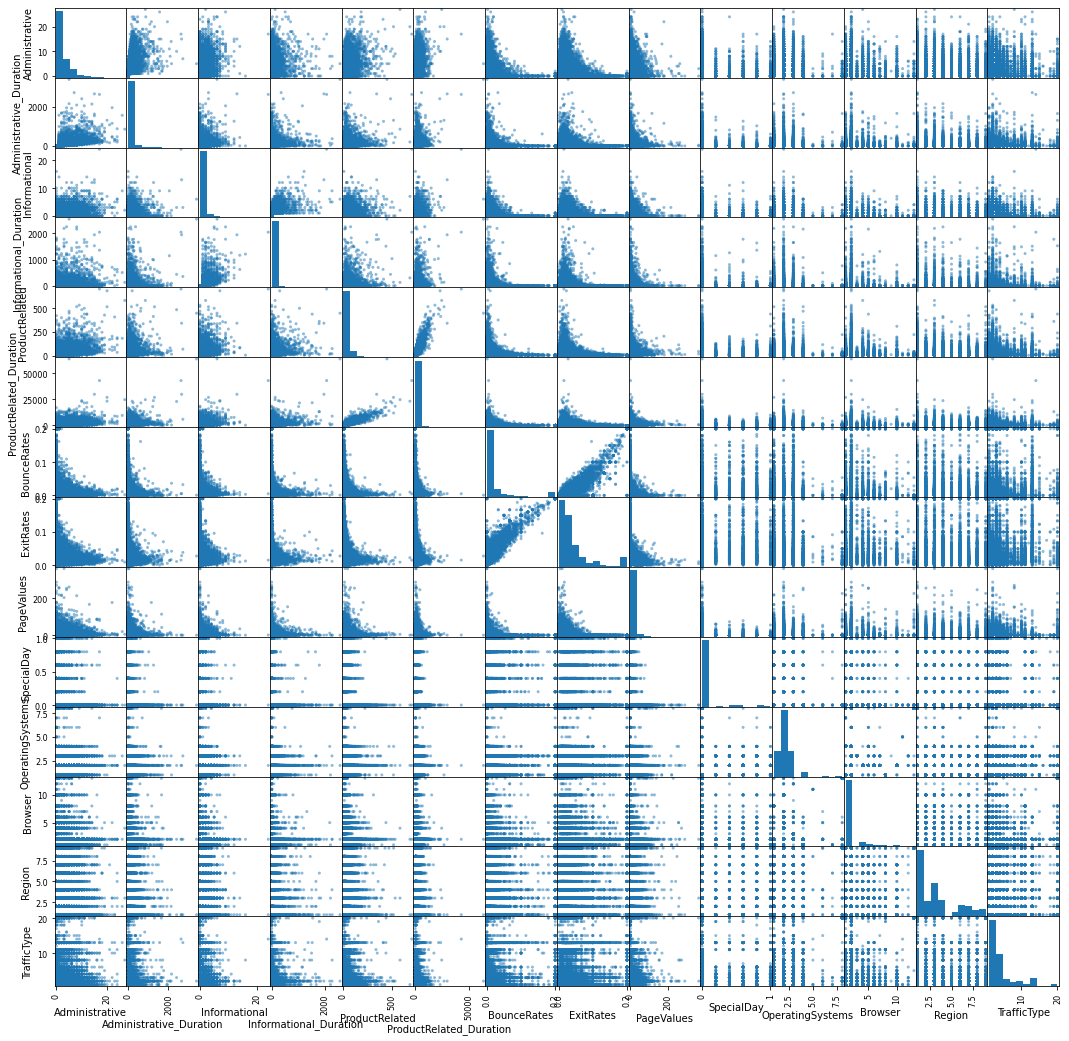

In [66]:
# use scatter_matrix of pandas.plotting
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration',
                     'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues',
                     'SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType']], figsize=(18, 18))
#scatter_matrix(data,figsize=(18,18),diagnol='hist')
plt.show()

## Box plot

       Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration   BounceRates     ExitRates    PageValues    SpecialDay  OperatingSystems       Browser        Region   TrafficType
count    12330.000000             12330.000000   12330.000000            12330.000000    12330.000000             12330.000000  12330.000000  12330.000000  12330.000000  12330.000000      12330.000000  12330.000000  12330.000000  12330.000000
mean         2.315166                80.818611       0.503569               34.472398       31.731468              1194.746220      0.022191      0.043073      5.889258      0.061427          2.124006      2.357097      3.147364      4.069586
std          3.321784               176.779107       1.270156              140.749294       44.475503              1913.669288      0.048488      0.048597     18.568437      0.198917          0.911325      1.717277      2.401591      4.025169
min          0.000000       

<AxesSubplot:>

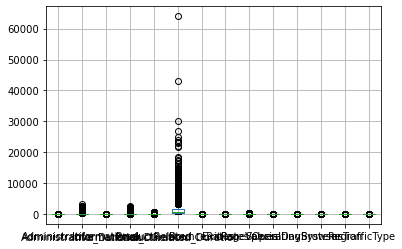

In [64]:
print(data[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration',
                     'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues',
                     'SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType']].describe())
data[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration',
                     'ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues',
                     'SpecialDay','OperatingSystems', 'Browser', 'Region', 'TrafficType']].boxplot()

## Correlation
Pearson,Kendall,Spearman

In [65]:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [45]:
data.corr('kendall')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.825302,0.319948,0.310850,0.348717,0.315699,-0.119048,-0.319712,0.274286,-0.109943,-0.004155,-0.010453,0.007464,-0.009410,0.035339,0.150152
Administrative_Duration,0.825302,1.000000,0.304060,0.296293,0.316777,0.302522,-0.123860,-0.317469,0.261145,-0.113217,-0.006211,-0.019233,0.014638,-0.012362,0.037345,0.143904
Informational,0.319948,0.304060,1.000000,0.898757,0.294750,0.291644,0.004973,-0.146362,0.199304,-0.051013,0.000021,-0.018618,-0.019613,-0.024641,0.041455,0.109535
Informational_Duration,0.310850,0.296293,0.898757,1.000000,0.285004,0.284413,-0.002265,-0.156494,0.201449,-0.050649,0.002675,-0.012115,-0.012723,-0.022154,0.044060,0.106734
ProductRelated,0.348717,0.316777,0.294750,0.285004,1.000000,0.719532,-0.047918,-0.367929,0.259276,-0.017377,0.016554,0.033905,-0.015810,-0.051400,0.028332,0.163667
ProductRelated_Duration,0.315699,0.302522,0.291644,0.284413,0.719532,1.000000,-0.058286,-0.334317,0.271544,-0.039747,0.018134,0.035273,-0.007089,-0.053169,0.022384,0.177313
BounceRates,-0.119048,-0.123860,0.004973,-0.002265,-0.047918,-0.058286,1.000000,0.492703,-0.105699,0.115758,0.044500,-0.039178,-0.013899,0.010633,-0.028098,-0.130140
ExitRates,-0.319712,-0.317469,-0.146362,-0.156494,-0.367929,-0.334317,0.492703,1.000000,-0.242448,0.121646,0.017456,-0.012657,-0.002888,0.015402,-0.055447,-0.208616
PageValues,0.274286,0.261145,0.199304,0.201449,0.259276,0.271544,-0.105699,-0.242448,1.000000,-0.065307,-0.011184,0.023083,0.001011,-0.014330,0.019567,0.592213
SpecialDay,-0.109943,-0.113217,-0.051013,-0.050649,-0.017377,-0.039747,0.115758,0.121646,-0.065307,1.000000,0.020962,0.019237,-0.013079,0.095553,-0.072789,-0.085179


In [47]:
data.corr('spearman')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.940725,0.369194,0.362861,0.460204,0.421613,-0.155219,-0.434389,0.328350,-0.125391,-0.004963,-0.012359,0.009413,-0.011739,0.039527,0.167945
Administrative_Duration,0.940725,1.000000,0.357150,0.352060,0.430072,0.413765,-0.163609,-0.437912,0.317329,-0.131622,-0.007425,-0.023003,0.018761,-0.015486,0.042549,0.163960
Informational,0.369194,0.357150,1.000000,0.950958,0.368673,0.367522,0.005753,-0.185691,0.219471,-0.054115,0.000017,-0.020386,-0.022920,-0.029061,0.043098,0.113876
Informational_Duration,0.362861,0.352060,0.950958,1.000000,0.361032,0.362720,-0.002474,-0.200056,0.223919,-0.054314,0.003003,-0.013451,-0.015007,-0.026349,0.046284,0.112120
ProductRelated,0.460204,0.430072,0.368673,0.361032,1.000000,0.882672,-0.052305,-0.518920,0.341975,-0.021536,0.021218,0.043554,-0.021400,-0.069877,0.034369,0.198545
ProductRelated_Duration,0.421613,0.413765,0.367522,0.362720,0.882672,1.000000,-0.079768,-0.476935,0.360282,-0.049578,0.023485,0.045758,-0.009666,-0.072516,0.027364,0.216764
BounceRates,-0.155219,-0.163609,0.005753,-0.002474,-0.052305,-0.079768,1.000000,0.602276,-0.123726,0.135341,0.053448,-0.047057,-0.017960,0.015583,-0.032165,-0.148977
ExitRates,-0.434389,-0.437912,-0.185691,-0.200056,-0.518920,-0.476935,0.602276,1.000000,-0.308002,0.151278,0.022357,-0.016319,-0.003934,0.022440,-0.067640,-0.254488
PageValues,0.328350,0.317329,0.219471,0.223919,0.341975,0.360282,-0.123726,-0.308002,1.000000,-0.070480,-0.012409,0.025728,0.001202,-0.017504,0.020695,0.626363
SpecialDay,-0.125391,-0.131622,-0.054115,-0.054314,-0.021536,-0.049578,0.135341,0.151278,-0.070480,1.000000,0.022679,0.020734,-0.014977,0.110150,-0.074242,-0.086878


## Split data into training set and test set

In [71]:
from sklearn.model_selection import train_test_split

data_x = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]
data_y = data[['Revenue']]
#X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)
#X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
8077,0,0.000000,0,0.0,5,81.083333,0.04,0.050000,0.000,0.0,Dec,3,2,1,2,New_Visitor,False
1568,0,0.000000,0,0.0,3,189.000000,0.00,0.066667,0.000,0.0,Mar,3,2,8,1,Returning_Visitor,False
462,0,0.000000,1,132.0,8,445.000000,0.00,0.014286,0.000,0.0,Mar,3,2,4,14,Returning_Visitor,True
743,0,0.000000,0,0.0,3,0.000000,0.20,0.200000,0.000,0.0,Mar,1,8,2,1,Returning_Visitor,False
222,0,0.000000,0,0.0,4,14.000000,0.10,0.150000,0.000,0.0,Mar,3,2,1,1,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,14,1005.608333,0,0.0,25,732.344872,0.00,0.015676,0.000,0.0,Nov,3,2,1,2,Returning_Visitor,False
5191,0,0.000000,0,0.0,14,340.000000,0.00,0.015385,23.388,0.0,May,2,2,3,1,Returning_Visitor,True
5390,0,0.000000,0,0.0,3,189.000000,0.00,0.066667,0.000,0.0,May,2,2,3,4,Returning_Visitor,False
860,0,0.000000,0,0.0,13,305.000000,0.00,0.016667,0.000,0.0,Mar,1,1,1,2,New_Visitor,False


In [79]:
#y_train

,Revenue
8077,False
1568,False
462,False
743,False
222,False
...,...
11964,False
5191,True
5390,False
860,False


## Preprocessing Pipeline & ColumnTransformer



In [72]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
#from sklearn.compose import make_column_transformer

# transformer for categorical features
categorical_features = ['Month','VisitorType','Weekend']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# transformer for numerical features
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','OperatingSystems',
       'Browser', 'Region', 'TrafficType']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)


data_processed = preprocessor.fit_transform(data_x)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=True, precision=2)

print(data_processed[0:20, :])

[[ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.   -0.7  -0.46 -0.4  -0.24 -0.69 -0.62  3.67  3.23 -0.32 -0.31 -1.23 -0.79 -0.89 -0.76]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.   -0.7  -0.46 -0.4  -0.24 -0.67 -0.59 -0.46  1.17 -0.32 -0.31 -0.14 -0.21 -0.89 -0.51]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.   -0.7  -0.46 -0.4  -0.24 -0.69 -0.62  3.67  3.23 -0.32 -0.31  2.06 -0.79  2.44 -0.27]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.   -0.7  -0.46 -0.4  -0.24 -0.67 -0.62  0.57  1.99 -0.32 -0.31  0.96 -0.21 -0.48 -0.02]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    1.   -0.7  -0.46 -0.4  -0.24 -0.49 -0.3  -0.05  0.14 -0.32 -0.31  0.96  0.37 -0.89 -0.02]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.   -0.7  -0.46 -0.4  -0.24

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(data_processed, data_y, test_size=0.3, random_state=42)

knn=KNeighborsClassifier() #k
svm=SVC() #C
dt=DecisionTreeClassifier() #ID3 C4.5 CART
knn.fit(X_train, y_train.values.ravel())

#knn_f=metrics.f1_score(y_test, knn.predict(X_test), average=None)
svm.fit(X_train, y_train.values.ravel())

#svm_f=metrics.f1_score(y_test, svm.predict(X_test), average=None)
dt.fit(X_train, y_train.values.ravel())

#dt_f=metrics.f1_score(y_test, dt.predict(X_test), average=None)


DecisionTreeClassifier()

In [133]:
from sklearn.metrics import classification_report
knn_f=classification_report(y_test, knn.predict(X_test))
svm_f=classification_report(y_test, svm.predict(X_test))
dt_f=classification_report(y_test, dt.predict(X_test))
print('KNN:',knn_f,'\nSVM:',svm_f,'\nDT:',dt_f)

KNN:               precision    recall  f1-score   support

       False       0.89      0.96      0.93      3124
        True       0.66      0.38      0.48       575

    accuracy                           0.87      3699
   macro avg       0.78      0.67      0.70      3699
weighted avg       0.86      0.87      0.86      3699
 
SVM:               precision    recall  f1-score   support

       False       0.91      0.97      0.94      3124
        True       0.73      0.48      0.58       575

    accuracy                           0.89      3699
   macro avg       0.82      0.72      0.76      3699
weighted avg       0.88      0.89      0.88      3699
 
DT:               precision    recall  f1-score   support

       False       0.92      0.91      0.92      3124
        True       0.54      0.55      0.55       575

    accuracy                           0.86      3699
   macro avg       0.73      0.73      0.73      3699
weighted avg       0.86      0.86      0.86      3699

